###Machine learning in python

Exercise 1 of Andrew Ng's coursera course

Linear regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

# loading data
data = pd.read_csv('ex1data1.txt', names=['Population', 'Profit']).as_matrix()
X = data[:,0]
Y = data[:,1]
m = float(len(Y))
X = np.c_[ np.ones(m), X]

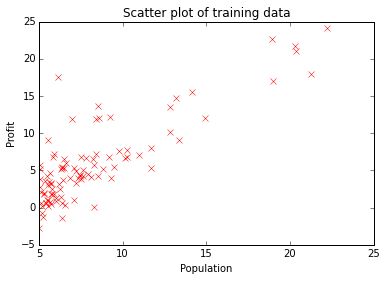

In [2]:
# creating a scatter plot
plt.plot(X[:,1],Y,'x',color='r')
plt.ylabel('Profit')
plt.xlabel('Population')
plt.title('Scatter plot of training data')
plt.show()

In [3]:
# gradient descent
def h_theta(theta, x):
    """
    computes the hypothesised function h_\theta
    inputs
        theta: 2 x 1 matrix
        x: 2 x 1 matrix
    returns
        value of hypothesised function: float
    """    
    return np.dot(theta, x)

In [4]:
def cost_function(X, y, theta):
    """
    computes the cost function of parameter theta
    inputs
        X: m x 2 matrix, where m is the training set
        y: m x 1 matrix
        theta: 2 x 1 matrix
    returns
        value of cost function: float
    """
    inner = np.power(((np.dot(X, theta) - Y)), 2)
    return np.sum(inner) / (2 * len(X))

In [5]:
def gradient_descent(theta, iterations, X, Y, alpha):
    """
    Implements the gradient descent algorithm
    
    """
    costs = []    
    for i in range(iterations):
        term = (np.dot(X, theta) - Y)
        theta = theta - (alpha/m)*np.dot(X.T, term)
        costs.append(cost_function(X, Y, theta))
    plt.plot(costs)
    plt.ylabel(r'$J(\theta)$', size=16)
    plt.xlabel('Iterations', size=16)
    plt.title('Does the cost function converge?', size=18)
    plt.show()
    return theta, costs

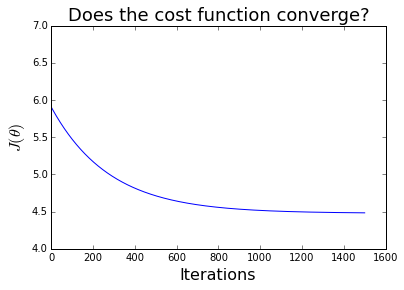

Theta is [-3.63029144  1.16636235]
Cost is 4.48338825659


In [6]:
theta = np.array((0,0))
costs = []
iterations = 1500
alpha = 0.01
t, c = gradient_descent(theta, iterations, X, Y, alpha)
print "Theta is", t
print "Cost is", c[-1]

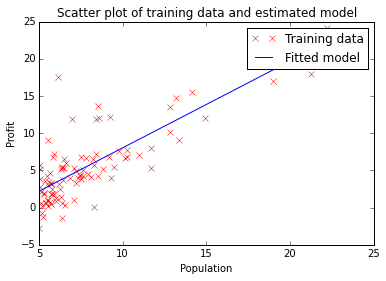

In [7]:
x_domain = np.linspace(float(min(X[:,1])), float(max(X[:,1])), 100)
fitted_data = []
for i in range(100):
    fitted_data.append(h_theta(t,(1,x_domain[i])))

plt.plot(X[:,1],Y,'x',color='r', label='Training data')
plt.plot(x_domain, fitted_data, label='Fitted model')
plt.ylabel('Profit')
plt.xlabel('Population')
plt.legend()
plt.title('Scatter plot of training data and estimated model')
plt.show()